In [9]:
import pandas as pd
import tensorflow as tf
import numpy as nm
import matplotlib 
import matplotlib.pyplot as mat

In [2]:
%matplotlib inline
mat.style.use("seaborn-v0_8-whitegrid")
from scipy import stats

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Junichiro Koizumi' 'Tony Blair']
(1041, 62, 47)


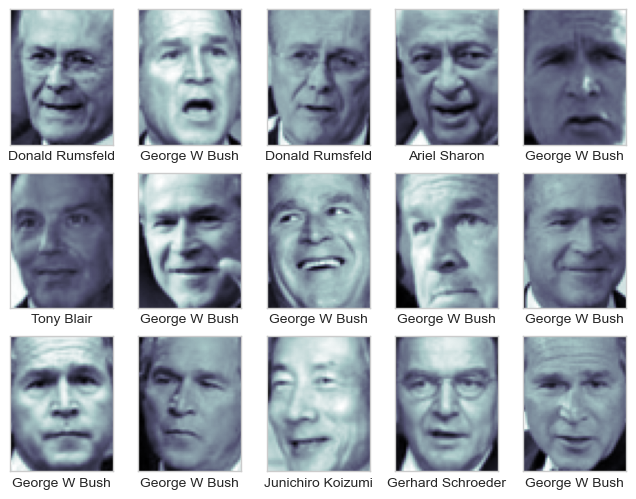

In [10]:
fig, ax= mat.subplots(3,5,figsize=(8,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [15]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca= PCA(n_components=150, whiten=True,
         svd_solver='randomized', random_state=42)
svc= SVC(kernel='rbf', class_weight='balanced')
model= make_pipeline(pca, svc)

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
              'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)             

CPU times: total: 6min 48s
Wall time: 2min 15s
{'svc__C': 10, 'svc__gamma': 0.001}


In [29]:
model=grid.best_estimator_
yfit= model.predict(Xtest)

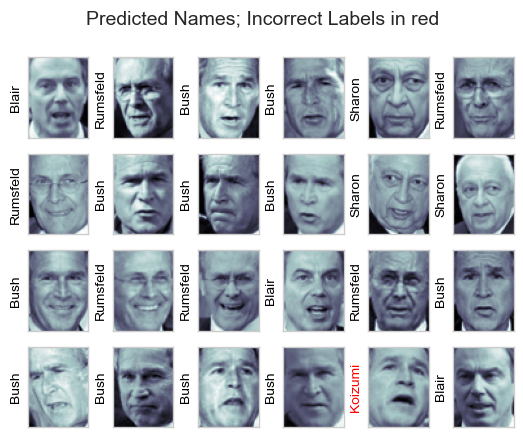

In [31]:
fig, ax= mat.subplots(4,6)
for i, axi  in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
               color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in red', size=14);

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.76      0.84        21
  Donald Rumsfeld       0.62      0.92      0.74        26
    George W Bush       0.93      0.88      0.90       140
Gerhard Schroeder       0.78      0.86      0.82        21
Junichiro Koizumi       0.69      1.00      0.82         9
       Tony Blair       0.95      0.80      0.86        44

         accuracy                           0.86       261
        macro avg       0.82      0.87      0.83       261
     weighted avg       0.88      0.86      0.87       261

